In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
x_data = pd.read_csv('/content/drive/MyDrive/customer-data.csv')

In [4]:
x_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [5]:
x_data.shape

(10000, 19)

In [6]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [7]:
x_data.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

object -> gender, race, education, income,


bool -> vehicle ownership, married, children, outcome, vehicle year, age, driving exp, vehicle type

Work:

1. Label Encoding of categorical features and create all classes in int
2. Filling Null Values through 3rd step
3. Feature Co-relation and importance
4. Answer ques in code
5. Answer descriptive ques
6. Classification Models apply -> best wle and predict accuracy

In [8]:
''' Converting bool to int '''

bool1 = x_data['vehicle_ownership'].astype(int)
x_data['vehicle_ownership'] = bool1
bool2 = x_data['married'].astype(int)
x_data['married'] = bool2
bool3 = x_data['children'].astype(int)
x_data['children'] = bool3
bool4 = x_data['outcome'].astype(int)
x_data['outcome'] = bool4
x_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


In [9]:
x_data['age'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [10]:
x_data['driving_experience'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [11]:
x_data['race'].unique()

array(['majority', 'minority'], dtype=object)

In [12]:
x_data['education'].unique()

array(['high school', 'none', 'university'], dtype=object)

In [13]:
x_data['income'].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [14]:
x_data['vehicle_year'].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [15]:
x_data['vehicle_type'].unique()

array(['sedan', 'sports car'], dtype=object)

In [16]:
x_data['gender'].unique()

array(['female', 'male'], dtype=object)

In [17]:
# Get  columns whose data type is object i.e. string
filteredColumns = x_data.dtypes[x_data.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['age', 'gender', 'race', 'driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type']


In [18]:
''' Converting object into int classes '''
import pandas as pd
import numpy as np
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
x_data['age']= label_encoder.fit_transform(x_data['age']) 
x_data['gender']= label_encoder.fit_transform(x_data['gender']) 
x_data['race']= label_encoder.fit_transform(x_data['race']) 
x_data['driving_experience']= label_encoder.fit_transform(x_data['driving_experience']) 
x_data['education']= label_encoder.fit_transform(x_data['education']) 
x_data['income']= label_encoder.fit_transform(x_data['income']) 
x_data['vehicle_year']= label_encoder.fit_transform(x_data['vehicle_year']) 
x_data['vehicle_type']= label_encoder.fit_transform(x_data['vehicle_type']) 
x_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,3,0,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0
1,750365,0,1,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1
2,199901,0,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0
3,478866,0,1,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0
4,731664,1,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1


In [19]:
x_data.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [20]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   race                 10000 non-null  int64  
 4   driving_experience   10000 non-null  int64  
 5   education            10000 non-null  int64  
 6   income               10000 non-null  int64  
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  int64  
 9   vehicle_year         10000 non-null  int64  
 10  married              10000 non-null  int64  
 11  children             10000 non-null  int64  
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  int64  
 15  speeding_violations  10000 non-null  

In [21]:
credit_score_mean = x_data['credit_score'].mean()
x_data['credit_score'].fillna(value = credit_score_mean, inplace = True)
annual_mileage_mean = x_data['annual_mileage'].mean()
x_data['annual_mileage'].fillna(value = annual_mileage_mean, inplace = True)

In [22]:
x_data.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlation heatmap')

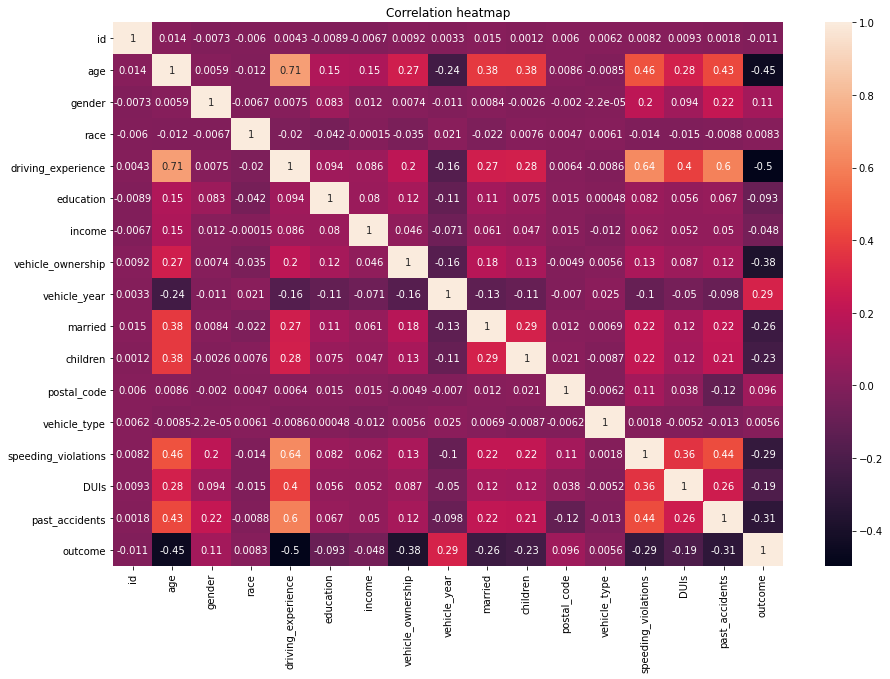

In [27]:
"""Storing all the continuous train data in x_cont"""
x_cont = x_data.select_dtypes('int64')
'''Finding Correlation between continuous features '''
x_cont['outcome'] = x_data['outcome']
plt.figure(figsize = (15,10))
correlation = x_cont.corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [32]:
X = x_data.loc[:, x_data.columns != 'outcome']

In [33]:
y = x_data['outcome']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Logistic Regression

In [35]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [72]:
lr_score = lr.score(X_test, y_test)
print(lr_score)

0.6888


Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB


In [41]:
nb =  GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
nb_score = nb.score(X_test, y_test)
print(nb_score)

0.6952


Stoochastic Gradient Descent

In [42]:
from sklearn.linear_model import SGDClassifier

In [52]:
sgd =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)
sgd_score = sgd.score(X_test, y_test)
print(sgd_score)

0.3108


In [53]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['outcome'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[  13 1710]
 [  13  764]]
accuracy: 0.3108
precision: 0.3088116410670978
recall: 0.9832689832689833
f1 score:  0.47000922792986777


KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
error_rate = []
for i in range(1,51):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

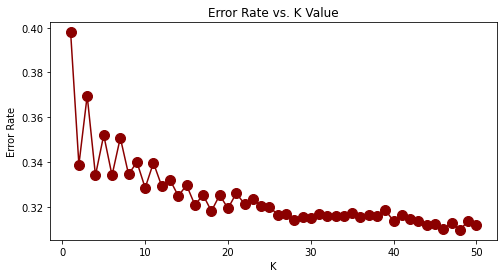

In [47]:
plt.figure(figsize=(8,4))
plt.plot(range(1,51),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [50]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['outcome'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[1593  130]
 [ 694   83]]
accuracy: 0.6704
precision: 0.38967136150234744
recall: 0.10682110682110682
f1 score:  0.16767676767676767


In [54]:
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.6704


Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

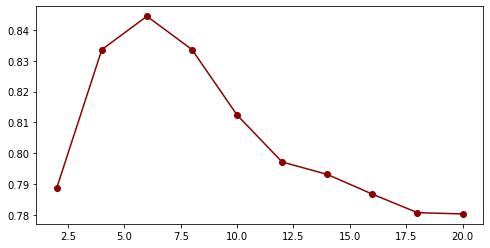

In [56]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

In [57]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)
dtree.fit(X_train, y_train)
y_pred=dtree.predict(X_test)

In [58]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['outcome'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[1570  153]
 [ 239  538]]
accuracy: 0.8432
precision: 0.7785817655571635
recall: 0.6924066924066924
f1 score:  0.7329700272479565


In [60]:
dt_score = dtree.score(X_test, y_test)
print(dt_score)

0.8432


Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


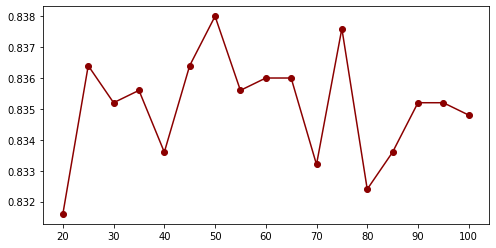

In [62]:
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

In [63]:
rf = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 30)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [64]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['outcome'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[1533  190]
 [ 194  583]]
accuracy: 0.8464
precision: 0.7542043984476067
recall: 0.7503217503217503
f1 score:  0.752258064516129


In [70]:
rf_score = rf.score(X_test, y_test)
print(rf_score)

0.8464


SVM

In [65]:
from sklearn.svm import SVC

In [67]:
svm =  SVC(kernel="linear", C=0.025,random_state=101)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

In [68]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['outcome'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[1638   85]
 [ 678   99]]
accuracy: 0.6948
precision: 0.5380434782608695
recall: 0.1274131274131274
f1 score:  0.2060353798126951


In [69]:
svm_score = svm.score(X_test, y_test)
print(svm_score)

0.6948


SUMMARY OF ALL MODELS:

In [73]:
print("Logistic regression = %f" % (lr_score))
print("naive bayes = %f" % (nb_score))
print("SGD = %f" % (sgd_score))
print("KNN = %f" % (knn_score))
print("DT = %f" % (dt_score))
print("Random Forest = %f" % (rf_score))
print("SVM = %f" % (svm_score))

Logistic regression = 0.688800
naive bayes = 0.695200
SGD = 0.310800
KNN = 0.670400
DT = 0.843200
Random Forest = 0.846400
SVM = 0.694800


Therefore, the best accuracy came out to be 84.64% using Random Forest Classifier Model.

Exploratory Questions
The client has some specific questions that they would like you to answer that they have not been able to answer themselves.
Perform any pre-processing / cleaning of the data necessary to answer these questions.
1. What proportion of customers with a credit score below 0.2 made a claim in the last year?
2. What is the average number of speeding violations among customers with driving experience between 20 and 29
years (inclusive)?
3. What if you consider only the people in this group who drive a sports car?
4. What is the standard deviation in annual mileage?

As well as these specific questions, you suspect that they just want to understand their data better.
1. Are there particular customer types?
2. What do claimants have in common?
3. How does the number of claims vary between postcodes?

In addition to understanding the data they have; the client is interested to know how they should collect data in the future in
order to better support data science work.
1. Are there any problems with the data you have been given that should be kept in mind when modelling?
2. Has the client collected the right data for their business needs?
3. What recommendations would you make to the client for future data collection?

Modelling
The client is interested to know if the customer data can be used to predict the likelihood that a claim is made in the next
year. Your task is to investigate this and make a recommendation. You should complete the following tasks:
1. Briefly discuss any assumptions being made about the data
2. Build a proof-of-concept model to predict the outcome column from the customer data, including any necessary data
processing
3. Test your model using appropriate metrics and state how you would expect it to perform on unseen data.
4. The client is keen to be able to interpret the model you build and would be particularly interested in understanding
which features are most important to the model's decisions.
5. They are also new to data science and interested in how this exciting new model you've built them works. Write a
brief (no longer than a paragraph) description of how your model works that can be understood by someone without
a technical background.

In [75]:
''' What proportion of customers with a credit score below 0.2 made a claim in the last year? '''
x_data.query("credit_score < 0.2 and outcome == 1")['outcome'].sum()

59

In [77]:
x_data.shape

(10000, 19)

In [78]:
proportion = (59/10000)*100

In [80]:
print("The proportion of customers with a credit score below 0.2 made a claim in the last year are: ", proportion)

The proportion of customers with a credit score below 0.2 made a claim in the last year are:  0.59


In [81]:
''' What is the average number of speeding violations among customers with driving experience between 20 and 29 years (inclusive) '''
x_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,3,0,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0
1,750365,0,1,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1
2,199901,0,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0
3,478866,0,1,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0
4,731664,1,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1


In [83]:
avg=(x_data.query("driving_experience == 2")['outcome'].sum() ) / 10000

In [84]:
print(avg)

0.0109
